In [ ]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import scipy as sp

\begin{equation}
F_a =  \frac{1}{2}C_d\rho Av^2
\end{equation}

\begin{equation}
F_e =  \dot{m}v_e + A(P_1 - P_2)
\end{equation}

\begin{equation}
F_g = mg
\end{equation}

In [ ]:
# Funciones
def resistencia_aire(v_x, v_y, v_z,v_viento_x,v_viento_y):
    v_rel_x = v_x - v_viento_x
    v_rel_y = v_y - v_viento_y
    v_rel_z = v_z
    v_rel = np.sqrt(v_rel_x**2 + v_rel_y**2 + v_rel_z**2)
    F_D_x = -0.5 * C_D * rho * A * v_rel * v_rel_x
    F_D_y = -0.5 * C_D * rho * A * v_rel * v_rel_y
    F_D_z = -0.5 * C_D * rho * A * v_rel * v_z

    return F_D_x, F_D_y, F_D_z

def ecuaciones_movimiento(params,t):

    x = params[0]
    y = params[1]
    z = params[2]
    v_x = params[3]
    v_y = params[4]
    v_z = params[5]
    m = params[6]
    v_viento_x = params[7]
    v_viento_y = params[8]

    F_D_x, F_D_y, F_D_z = resistencia_aire(v_x, v_y, v_z,v_viento_x,v_viento_y)

    if m > m_estructura:

        empuje_x = T * np.cos(theta) * np.cos(fhi)
        empuje_y = T * np.sin(theta) * np.cos(fhi)
        empuje_z = T * np.sin(fhi)
        dm = -dm_dt

    else:

        empuje_x = empuje_y = empuje_z = 0
        dm = 0

    a_x = (empuje_x + F_D_x) / m
    a_y = (empuje_y + F_D_y) / m
    a_z = (empuje_z + F_D_z) / m - g

    return [v_x, v_y, v_z, a_x, a_y, a_z, dm,0,0]

In [ ]:
# Condiciones iniciales
g = 9.81  # (m/s^2)
rho = 1.225  # Densidad del aire (kg/m^3)
C_D = 0.5  # Coeficiente de arrastre
A = 0.5  # Área (m^2)
T = 10000  # Empuje (N)
dm_dt = 10  # Consumo de combustible (kg/s)
m_estructura = 100  # Masa cohete (kg)
m_combustible = 200  # Masa combustible (kg)
viento_x = 40  # Velocidad del viento en x (m/s)
viento_y = -300  # Velocidad del viento en y (m/s)
theta = np.radians(10)  # Ángulo de inclinación plano xy
fhi = np.radians(80) # Ángulo de inclinación z

In [ ]:
# Calculo
t = np.linspace(0, 200, 800)
params = np.array([0, 0, 0, 0, 0, 0, m_estructura + m_combustible,viento_x,viento_y])
sol = np.zeros(len(t))
sol = sp.integrate.odeint(ecuaciones_movimiento, params, t)
# Resultados
x, y, z = sol[:, 0], sol[:, 1], sol[:, 2]

In [ ]:
#Polinomio de z(t)
pol_alt = sp.interpolate.CubicSpline(t,z)
#Hallar raiz
def pos_z(t):
  return pol_alt(t)

tiempo_vuelo = sp.optimize.root_scalar(pos_z,bracket = [t[1],t[-1]], method = 'brentq')
indi_close = np.argmin(np.abs(t - tiempo_vuelo.root)) #Calcula el indice con el término mas cercano

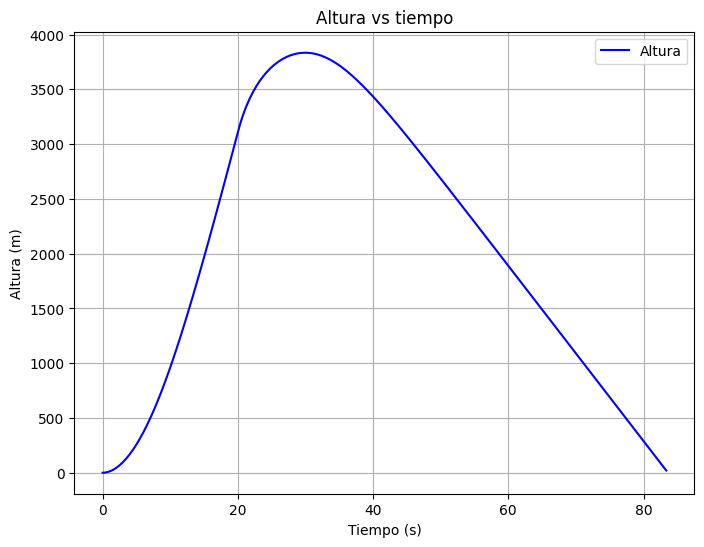

In [ ]:
# Crear gráfica de altura vs tiempo
plt.figure(figsize=(8, 6))
plt.plot(t[:indi_close], z[:indi_close], label='Altura', color='blue')
plt.xlabel('Tiempo (s)')
plt.ylabel('Altura (m)')
plt.title('Altura vs tiempo')
plt.legend()
plt.grid()
plt.show()

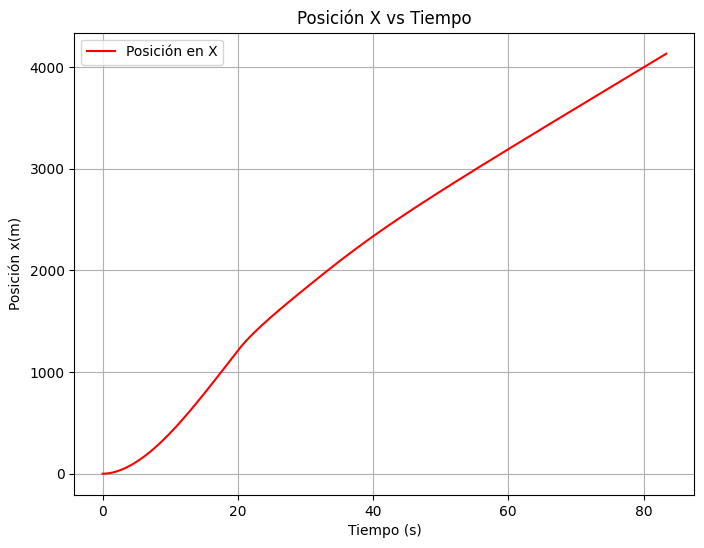

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(t[:indi_close], x[:indi_close], label='Posición en X', color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición x(m)')
plt.title('Posición X vs Tiempo')
plt.legend()
plt.grid()
plt.show()

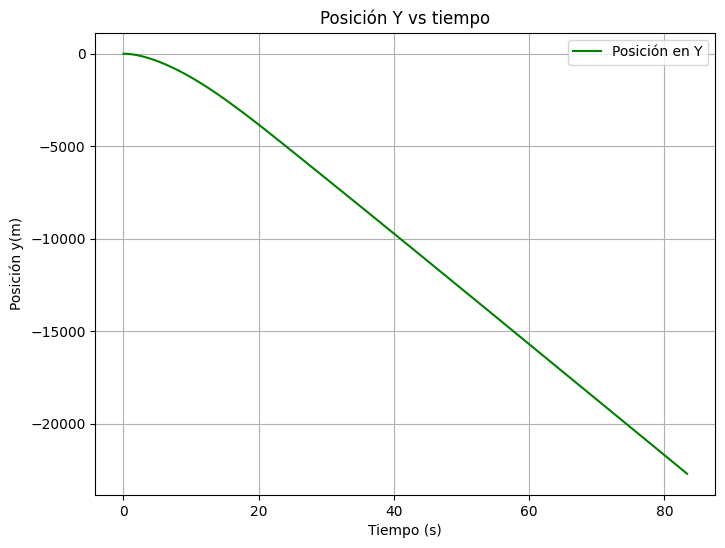

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(t[:indi_close], y[:indi_close], label='Posición en Y', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición y(m)')
plt.title('Posición Y vs tiempo')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Crear figura 3D con Plotly
fig_3d = go.Figure()
fig_3d.add_trace(go.Scatter3d(x=x[:indi_close], y=y[:indi_close], z=z[:indi_close], mode='lines', line=dict(color='red', width=2), name='Trayectoria del cohete'))
fig_3d.update_layout(title="Simulación de la trayectoria del cohete en 3D",
                     scene=dict(xaxis_title='X (m)', yaxis_title='Y (m)', zaxis_title='Z (m)'))
fig_3d.show()

<ipython-input-43-7e7548228bf3>:43: RuntimeWarning:

invalid value encountered in divide

<ipython-input-43-7e7548228bf3>:44: RuntimeWarning:

invalid value encountered in divide

<ipython-input-43-7e7548228bf3>:45: RuntimeWarning:

invalid value encountered in divide



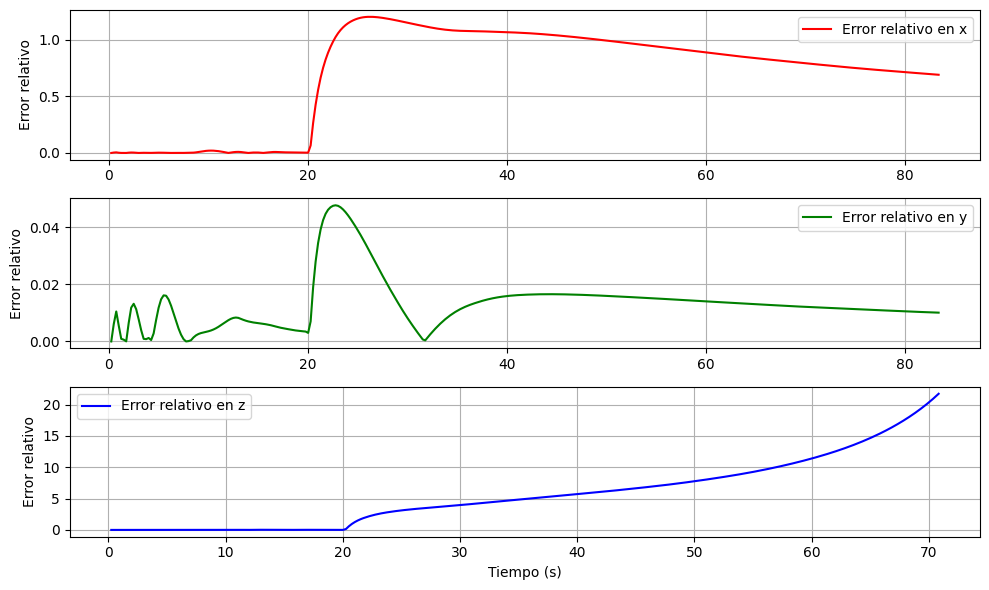

In [ ]:
#Error en odeint comparado con otro metodo

def ecuaciones_movimiento_1(t,params):

    x = params[0]
    y = params[1]
    z = params[2]
    v_x = params[3]
    v_y = params[4]
    v_z = params[5]
    m = params[6]
    v_viento_x = params[7]
    v_viento_y = params[8]

    F_D_x, F_D_y, F_D_z = resistencia_aire(v_x, v_y, v_z,v_viento_x,v_viento_y)

    if m > m_estructura:

        empuje_x = T * np.cos(theta) * np.cos(fhi)
        empuje_y = T * np.sin(theta) * np.cos(fhi)
        empuje_z = T * np.sin(fhi)
        dm = -dm_dt

    else:

        empuje_x = empuje_y = empuje_z = 0
        dm = 0

    a_x = (empuje_x + F_D_x) / m
    a_y = (empuje_y + F_D_y) / m
    a_z = (empuje_z + F_D_z) / m - g

    return [v_x, v_y, v_z, a_x, a_y, a_z, dm,0,0]

sol_1 = sp.integrate.solve_ivp(ecuaciones_movimiento_1, [t[0], t[-1]], params, method='RK45', t_eval=t)

x_1 = sol_1.y[0]
y_1 = sol_1.y[1]
z_1 = sol_1.y[2]

eps = 1e-4

error_rel_x = (np.abs(x - x_1) / (np.abs(x))) * 100
error_rel_y = (np.abs(y - y_1) / (np.abs(y))) * 100
error_rel_z = (np.abs(z - z_1) / (np.abs(z))) * 100

# Graficar
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t[:indi_close], error_rel_x[:indi_close], color='red', label="Error relativo en x")
plt.legend()
plt.ylabel("Error relativo")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t[:indi_close], error_rel_y[:indi_close], color='green', label="Error relativo en y")
plt.legend()
plt.ylabel("Error relativo")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t[:indi_close - 50], error_rel_z[:indi_close - 50], color='blue', label="Error relativo en z")
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Error relativo")
plt.grid()

plt.tight_layout()
plt.show()

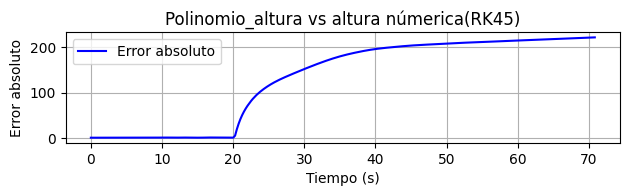

In [ ]:
#Error en el polinomio
error_pol_2 = (np.abs(pol_alt(t) - z_1))

plt.subplot(3, 1, 3)
plt.title('Polinomio_altura vs altura númerica(RK45)')
plt.plot(t[:indi_close - 50], error_pol_2[:indi_close - 50], color='blue',label='Error absoluto')
plt.legend()
plt.xlabel("Tiempo (s)")
plt.ylabel("Error absoluto")
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
error_rel_raiz = (np.abs(tiempo_vuelo.root - t[indi_close]) / np.abs(t[indi_close]) + eps) * 100

print(f'El error relativo es: {error_rel_raiz}')

El error relativo es: 0.017505611771937764
